Car Price Prediction

In [316]:
#Importing Libraries:
import numpy as np
import pandas as pd

In [317]:
#Reading excel file and converting it in dataframe
ds= pd.read_excel("C:\\Users\\hp\\Desktop\\Cars_Data.xlsx")
df=pd.DataFrame(ds)
df.head()

,Unnamed:0,Model Year,Brand,Car Name,Variant,Distance Travelled,Number of Owners,fuel type,Price
0,0,2012,Maruti,Swift Dzire,Manual,118117,1st,Diesel,316399
1,1,2016,Renault,Kwid,Manual,46028,2nd,Petrol,277599
2,2,2013,Maruti,Swift,Manual,114506,1st,Diesel,341599
3,3,2014,Maruti,Ritz,Manual,43382,1st,Diesel,344199
4,4,2013,Hyundai,i20,Manual,64361,1st,Diesel,355799


Dataset in Dataframe format.
Regression Model

In [3]:
# Rows & Columns in dataset:

df.shape

(7085, 9)

Dataset has 7085 Rows and 9 Columns

In [41]:
# Datatype of dataset

df.dtypes

Unnamed:0              int64
Model Year             int64
Brand                 object
Car Name              object
Variant               object
Distance Travelled     int64
Number of Owners      object
fuel type             object
Price                  int64
dtype: object

There are 5 Object datatype and 4 numeric datatype.
Target label is 'Price' which is int type.

In [3]:
# Information about data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7085 entries, 0 to 7084
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed:0           7085 non-null   int64 
 1   Model Year          7085 non-null   int64 
 2   Brand               7085 non-null   object
 3   Car Name            7085 non-null   object
 4   Variant             6861 non-null   object
 5   Distance Travelled  7085 non-null   int64 
 6   Number of Owners    7085 non-null   object
 7   fuel type           7085 non-null   object
 8   Price               7085 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 498.3+ KB


Total count in each column is 7085, Variant column has nan values
There are 4 numeric values and 5 object values.

In [42]:
# Checking Unique values of Dataset:

column_name =df.columns.values
for column in column_name:
    print("{0}: {1}".format(column, df[column].unique()))

Unnamed:0: [   0    1    2 ... 1027 1028 1029]
Model Year: [2012 2016 2013 2014 2018 2017 2019 2015 2020 2010 2011 2009 2021 2008
 2007 2006 2005 1999 2004 2002 2003 2000]
Brand: ['Maruti' 'Renault' 'Hyundai' 'Honda' 'BMW' 'Ford' 'Toyota' 'Volvo' 'Tata'
 'MG' 'Mahindra' 'Datsun' 'Audi' 'Skoda' 'Volkswagen' 'Nissan' 'HYUNDAI'
 'KIA' 'Mercedes' 'Jeep' 'Ssangyong' 'Landrover' 'Jaguar' 'Kia'
 'Chevrolet' 'Mercedes-Benz' 'Land' 'Fiat' 'Porsche' 'Mitsubishi' 'Mini']
Car Name: ['Swift Dzire' 'Kwid' 'Swift' 'Ritz' 'i20' 'City' 'Wagon R 1.0' 'Ciaz'
 'Vitara Brezza' 'X1' 'S Cross' 'Tucson New' 'FREESTYLE' 'Baleno' 'Fiesta'
 'Alto 800' 'Fortuner' 'S60' 'Tiago' 'Verna' 'AURA' 'HECTOR' '3 Series'
 'TUV300' 'New Wagon-R' 'Xcent' 'S PRESSO' 'IGNIS' 'New Figo' 'Creta'
 'Elite i20' 'Redi Go' 'VENUE' 'Ecosport' 'Dzire' 'Q3' 'Glanza'
 'Grand i10' 'Innova' 'Amaze' 'Ertiga' 'Superb' 'Jazz' 'Figo Aspire'
 'YARIS' 'Corolla Altis' 'Brio' 'Duster' 'Etios Liva' 'Alto K10' 'Etios'
 'Polo' 'XUV500' '5 Series' 'Ce

Variant Column has nan values and other columns have no null values.

## Data Pre Processing:

In [318]:
# Replacing values of Number of Owners

df['Number of Owners'] = df['Number of Owners'].replace({'1st':'1', '2nd':'2', '3rd':'3', '4th':'4' })
df['Number of Owners'].value_counts()

1    5296
2    1706
3      76
4       7
Name: Number of Owners, dtype: int64

In [319]:
# Number of Owners column datatype changed from object to int64

df['Number of Owners']=df['Number of Owners'].astype('int64')

In [320]:
# Replacing values of Variant column

df['Variant'] = df['Variant'].replace({'manual':'Manual', 'automatic':'Automatic'})
df['Variant'].value_counts()

Manual       5789
Automatic    1072
Name: Variant, dtype: int64

In [321]:
# finding mode of Variant column

df['Variant'].mode()

0    Manual
dtype: object

In [322]:
# Filling nan value in dataset with mode

df['Variant'].fillna(df['Variant'].mode()[0],inplace=True)

In [323]:
# Variant column values replaced 

df['Variant'] = df['Variant'].replace({'Manual':0, 'Automatic':1})
df['Variant'].value_counts()

0    6013
1    1072
Name: Variant, dtype: int64

In [324]:
#checking values of fuel type column
df['fuel type'].unique()

array(['Diesel', 'Petrol', 'Petrol + CNG', 'Petrol + LPG', 'CNG', 'LPG',
       'Electric(Battery)'], dtype=object)

In [325]:
# fuel type column value replaced 

df['fuel type'] = df['fuel type'].replace({'Petrol + CNG':'Petrol', 'Petrol + LPG':'Petrol', 'Electric(Battery)':'Electric'})
df['fuel type'].value_counts()

Petrol      4728
Diesel      2320
CNG           33
LPG            3
Electric       1
Name: fuel type, dtype: int64

In [326]:
# fuel type column value replaced to numeric value

df['fuel type'] = df['fuel type'].replace({'Diesel':0, 'Petrol':1, 'CNG':2, 'LPG':3, 'Electric':4})
df['fuel type'].value_counts()

1    4728
0    2320
2      33
3       3
4       1
Name: fuel type, dtype: int64

In [293]:
#after pre processing checking information of dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7085 entries, 0 to 7084
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed:0           7085 non-null   int64 
 1   Model Year          7085 non-null   int64 
 2   Brand               7085 non-null   object
 3   Car Name            7085 non-null   object
 4   Variant             7085 non-null   int64 
 5   Distance Travelled  7085 non-null   int64 
 6   Number of Owners    7085 non-null   int64 
 7   fuel type           7085 non-null   int64 
 8   Price               7085 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 498.3+ KB


# Data Cleaning:

In [327]:
#dropped Unnamed:0 column as it didnt affected the price column for prediction.

df.drop(['Unnamed:0'],axis=1,inplace=True)
df.head()

,Model Year,Brand,Car Name,Variant,Distance Travelled,Number of Owners,fuel type,Price
0,2012,Maruti,Swift Dzire,0,118117,1,0,316399
1,2016,Renault,Kwid,0,46028,2,1,277599
2,2013,Maruti,Swift,0,114506,1,0,341599
3,2014,Maruti,Ritz,0,43382,1,0,344199
4,2013,Hyundai,i20,0,64361,1,0,355799


# EDA

## Visualisation

In [328]:
import seaborn as sns
import matplotlib.pyplot as plt

## Plotting Numeric data

<AxesSubplot:xlabel='Price', ylabel='Density'>

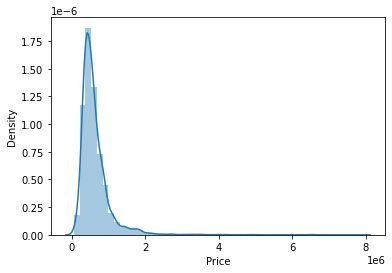

In [298]:
# Target Label plotting:

sns.distplot(df['Price'], kde=True)

Data is not equally distributed and has skewness

<AxesSubplot:xlabel='Distance Travelled', ylabel='Density'>

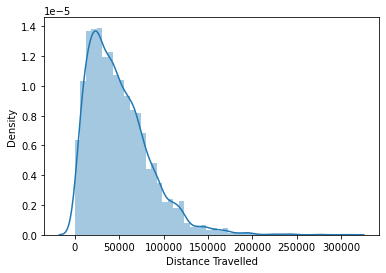

In [300]:
sns.distplot(df['Distance Travelled'], kde=True)

Data is not equally distributed and has skewness
Maximum distance travelled is between 0 to 100000 km

<Figure size 2160x720 with 0 Axes>

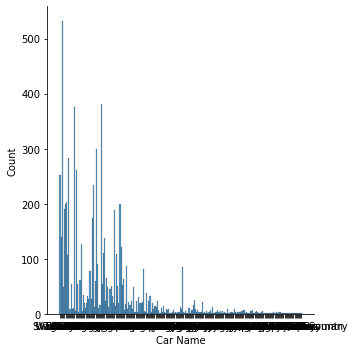

In [306]:
plt.figure(figsize=(30,10))
sns.displot(df['Car Name'])

Maximum cars are mid ranged which have higher count.

<AxesSubplot:xlabel='Variant', ylabel='count'>

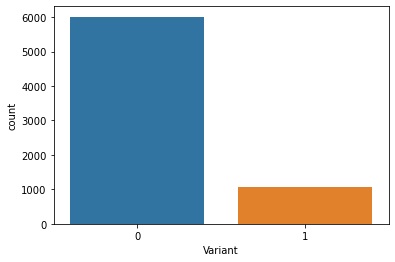

In [303]:
sns.countplot(df['Variant'])

O value has higher values than 1 in Variant column

<AxesSubplot:xlabel='fuel type', ylabel='count'>

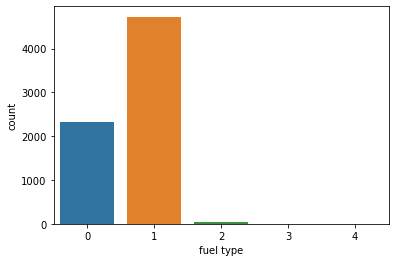

In [217]:
sns.countplot(df['fuel type'])

Fuel Type column has maximum value count of 1 which is Petrol.

<AxesSubplot:xlabel='Number of Owners', ylabel='count'>

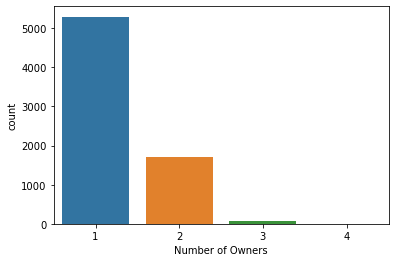

In [218]:
sns.countplot(df['Number of Owners'])

Number of Owners columns has maximum count of 1 owners.

<AxesSubplot:xlabel='Model Year', ylabel='count'>

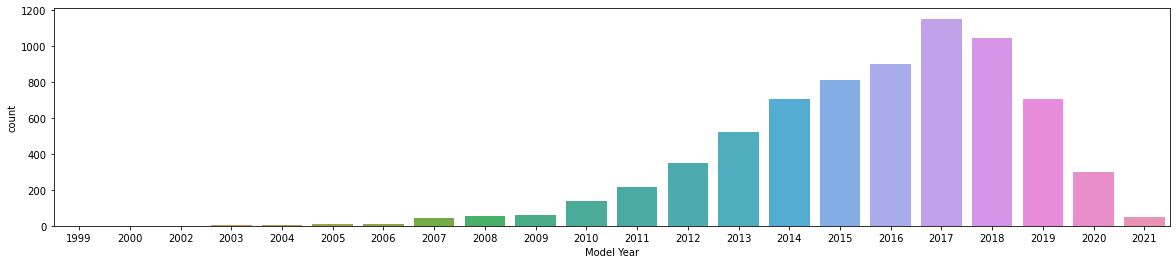

In [221]:
plt.figure(figsize=(20,4))
sns.countplot(df['Model Year'])

Maximum used cars are of 2017 year and after that its 2018 year.

<AxesSubplot:xlabel='Price', ylabel='Number of Owners'>

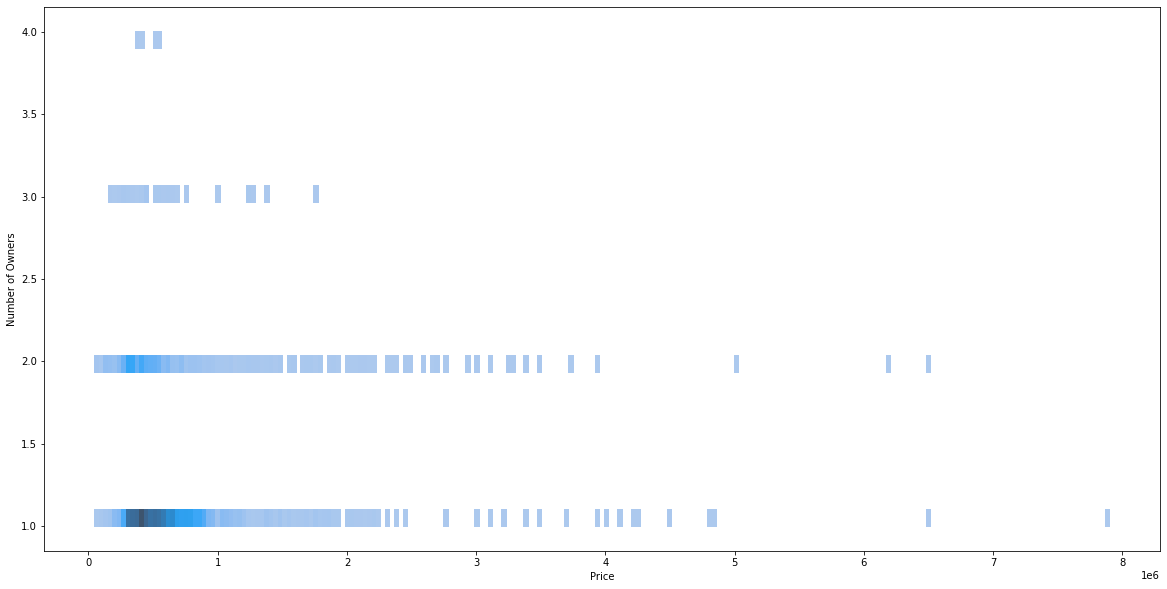

In [315]:
plt.figure(figsize=(20,10))
sns.histplot(x = "Price", y = "Number of Owners", data = df)

Maximum cars are mid ranged and have 1 owner.

<AxesSubplot:xlabel='Price', ylabel='Variant'>

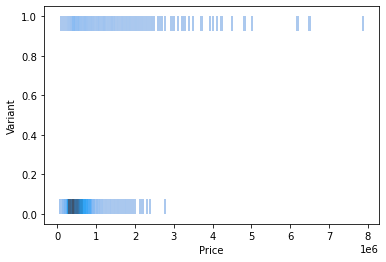

In [331]:
sns.histplot(x = "Price", y = "Variant", data = df)

Maximum car variant are manual which are ranged in mid range prices.

<AxesSubplot:xlabel='Price', ylabel='fuel type'>

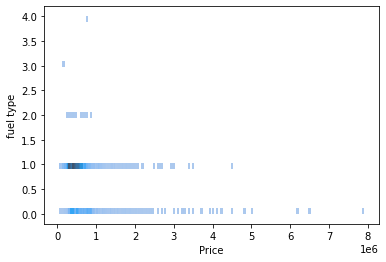

In [332]:
sns.histplot(x = "Price", y = "fuel type", data = df)

mid range petrol cars have higher demand.

<AxesSubplot:xlabel='Model Year', ylabel='fuel type'>

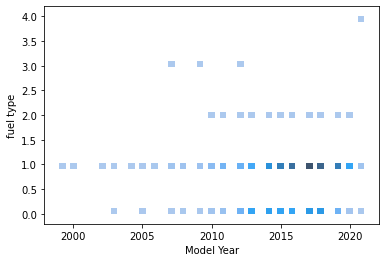

In [333]:
sns.histplot(x = "Model Year", y = "fuel type", data = df)

car model between 2015 to 2020 of petrol fuel have higher demand.

## Encoding

In [227]:
# Label Encoding for object to numeric datatype:
from sklearn.preprocessing import LabelEncoder
en= LabelEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=en.fit_transform(df[i].values.reshape(-1,1))

In [228]:
df.head()

,Model Year,Brand,Car Name,Variant,Distance Travelled,Number of Owners,fuel type,Price
0,2012,17,174,0,118117,1,0,316399
1,2016,24,106,0,46028,2,1,277599
2,2013,17,173,0,114506,1,0,341599
3,2014,17,145,0,43382,1,0,344199
4,2013,8,216,0,64361,1,0,355799


In [229]:
# describing dataset:

df.describe()

,Model Year,Brand,Car Name,Variant,Distance Travelled,Number of Owners,fuel type,Price
count,7085.000000,7085.000000,7085.000000,7085.000000,7085.000000,7085.000000,7085.000000,7.085000e+03
mean,2015.734651,14.465914,104.983486,0.151306,49201.071560,1.265208,0.678476,6.158964e+05
std,2.798098,6.772489,68.481719,0.358372,34470.718501,0.471472,0.481382,4.264524e+05
min,1999.000000,0.000000,0.000000,0.000000,58.000000,1.000000,0.000000,5.000000e+04
25%,2014.000000,8.000000,44.000000,0.000000,23180.000000,1.000000,0.000000,3.850000e+05
50%,2016.000000,17.000000,84.000000,0.000000,42560.000000,1.000000,1.000000,5.158990e+05
75%,2018.000000,17.000000,173.000000,0.000000,68000.000000,2.000000,1.000000,7.179990e+05
max,2021.000000,30.000000,217.000000,1.000000,308000.000000,4.000000,4.000000,7.900000e+06


Key Observations:

    1. Mean and Median: Values of mean is greater than median so skewness is present.
    2. 75% percentile and max have differences so Price, Distance travelled and model columns have outliers.
    3. Standard deviation is less than mean so high peak data.

In [230]:
# correlation of target label with feature columns
df.corr()

,Model Year,Brand,Car Name,Variant,Distance Travelled,Number of Owners,fuel type,Price
Model Year,1.000000,0.016604,-0.151726,0.046097,-0.497427,-0.307040,0.087461,0.335092
Brand,0.016604,1.000000,0.105454,-0.006017,0.071893,-0.039234,-0.062249,-0.052796
Car Name,-0.151726,0.105454,1.000000,-0.031068,0.090552,0.012972,-0.160521,-0.009165
Variant,0.046097,-0.006017,-0.031068,1.000000,-0.018355,0.097497,0.005461,0.388513
Distance Travelled,-0.497427,0.071893,0.090552,-0.018355,1.000000,0.150935,-0.426643,-0.060170
Number of Owners,-0.307040,-0.039234,0.012972,0.097497,0.150935,1.000000,-0.031631,-0.028314
fuel type,0.087461,-0.062249,-0.160521,0.005461,-0.426643,-0.031631,1.000000,-0.275771
Price,0.335092,-0.052796,-0.009165,0.388513,-0.060170,-0.028314,-0.275771,1.000000


<AxesSubplot:>

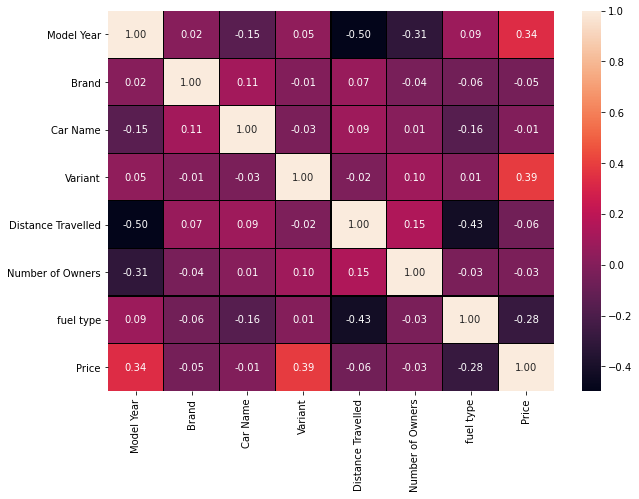

In [231]:
# Heatmap of Correlation

plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="Black",fmt="0.2f")

Key Observation:
 1. Price have positive correlation with Variant and negative correlation with fuel type.
 2. Variant has positive correlation with Price and negative correlation with Car Name.

Model Year                AxesSubplot(0.125,0.71587;0.110714x0.16413)
Brand                  AxesSubplot(0.257857,0.71587;0.110714x0.16413)
Car Name               AxesSubplot(0.390714,0.71587;0.110714x0.16413)
Variant                AxesSubplot(0.523571,0.71587;0.110714x0.16413)
Distance Travelled     AxesSubplot(0.656429,0.71587;0.110714x0.16413)
Number of Owners       AxesSubplot(0.789286,0.71587;0.110714x0.16413)
fuel type                AxesSubplot(0.125,0.518913;0.110714x0.16413)
Price                 AxesSubplot(0.257857,0.518913;0.110714x0.16413)
dtype: object

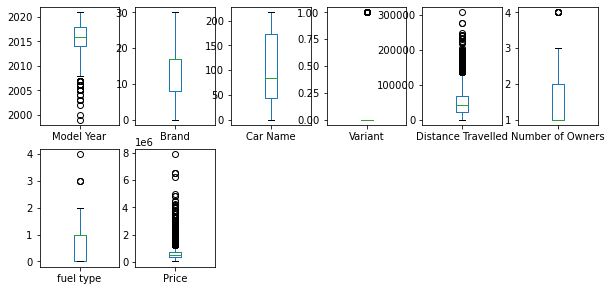

In [232]:
#Outliers:

df.plot(kind='box',subplots=True,layout=(4,6),figsize=(10,10))

Price, Distance travelled and model year have outliers

In [233]:
# Removing Outliers: 

from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  46,   73,   96,   97,  120,  131,  132,  149,  159,  173,  195,
         231,  320,  402,  411,  437,  462,  475,  544,  652,  663,  674,
         697,  727,  727,  783,  813,  939, 1041, 1053, 1078, 1099, 1119,
        1136, 1189, 1213, 1223, 1225, 1340, 1346, 1358, 1447, 1462, 1473,
        1475, 1482, 1488, 1515, 1555, 1581, 1590, 1632, 1637, 1696, 1698,
        1701, 1727, 1738, 1801, 1838, 1894, 1922, 1939, 1953, 2015, 2039,
        2058, 2059, 2090, 2091, 2107, 2116, 2129, 2149, 2183, 2262, 2341,
        2356, 2390, 2422, 2439, 2602, 2610, 2614, 2742, 2766, 2865, 2869,
        2888, 2925, 2958, 2976, 2982, 3001, 3033, 3086, 3135, 3155, 3208,
        3344, 3358, 3382, 3385, 3386, 3394, 3410, 3411, 3429, 3432, 3435,
        3456, 3462, 3463, 3465, 3471, 3479, 3489, 3690, 3705, 3749, 3776,
        3800, 3801, 3823, 3837, 3839, 3856, 3861, 3873, 3882, 3893, 3912,
        3951, 4180, 4222, 4246, 4543, 4554, 4577, 4606, 4607, 4609, 4615,
        4630, 4632, 4633, 4740, 4754, 

In [234]:
#removing value greater than threshold value 

df_new=df[(z<3).all(axis=1)]
df_new

,Model Year,Brand,Car Name,Variant,Distance Travelled,Number of Owners,fuel type,Price
0,2012,17,174,0,118117,1,0,316399
1,2016,24,106,0,46028,2,1,277599
2,2013,17,173,0,114506,1,0,341599
3,2014,17,145,0,43382,1,0,344199
4,2013,8,216,0,64361,1,0,355799
...,...,...,...,...,...,...,...,...
7080,2017,7,31,1,27500,2,1,600000
7081,2014,13,147,1,80000,2,0,1850000
7082,2012,5,70,0,65000,2,0,210999
7083,2012,7,44,1,87792,2,1,425000


In [235]:
df=df_new

In [236]:
df.shape

(6737, 8)

New Rows: 6737 and Columns: 8

#### Percentage Loss of data

In [313]:
Data_loss=((7085-6737)/7085)*100
Data_loss

4.911785462244178

4.9% data lost.

## Separating Target and feature variables

In [237]:
x =df.drop("Price",axis=1)  # Feature column
y =df["Price"]              # Target column

In [238]:
x.head()

,Model Year,Brand,Car Name,Variant,Distance Travelled,Number of Owners,fuel type
0,2012,17,174,0,118117,1,0
1,2016,24,106,0,46028,2,1
2,2013,17,173,0,114506,1,0
3,2014,17,145,0,43382,1,0
4,2013,8,216,0,64361,1,0


In [239]:
# Skewness:

x.skew()

Model Year           -0.581017
Brand                 0.293239
Car Name              0.232942
Variant               2.066930
Distance Travelled    0.792001
Number of Owners      1.254373
fuel type            -0.682410
dtype: float64

In [240]:
# Using power_transform to remove skewness.
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-1.46833394,  0.45387545,  0.99302523, ...,  1.86148584,
        -0.55328691, -1.41810632],
       [ 0.01950529,  1.36276979,  0.21310308, ...,  0.16726608,
         1.80738055,  0.62658902],
       [-1.10899709,  0.45387545,  0.98292723, ...,  1.79364821,
        -0.55328691, -1.41810632],
       ...,
       [-1.46833394, -1.53803863, -0.3190552 , ...,  0.70726031,
         1.80738055, -1.41810632],
       [-1.46833394, -1.1389574 , -0.80761218, ...,  1.24990468,
         1.80738055,  0.62658902],
       [-1.10899709, -2.91305864, -1.82083729, ...,  1.29815781,
         1.80738055, -1.41810632]])

In [247]:
# converting ndarray to dataframe
x=pd.DataFrame(x)

In [248]:
x.skew()

0   -0.443363
1   -0.067399
2   -0.159029
3    2.066930
4   -0.065431
5    1.254373
6   -0.284076
dtype: float64

In [249]:
#dropping column 5 as it has skewness and is negatively correlated with target column 

x.drop([5],axis=1,inplace=True)
x.head()

,0,1,2,3,4,6
0,-1.468334,0.453875,0.993025,-0.404671,1.861486,-1.418106
1,0.019505,1.362770,0.213103,-0.404671,0.167266,0.626589
2,-1.108997,0.453875,0.982927,-0.404671,1.793648,-1.418106
3,-0.741370,0.453875,0.685854,-0.404671,0.082668,-1.418106
4,-1.108997,-0.954011,1.391222,-0.404671,0.690625,-1.418106


In [250]:
## Scaling feature column:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.46833394,  0.45387545,  0.99302523, -0.40467129,  1.86148584,
        -1.41810632],
       [ 0.01950529,  1.36276979,  0.21310308, -0.40467129,  0.16726608,
         0.62658902],
       [-1.10899709,  0.45387545,  0.98292723, -0.40467129,  1.79364821,
        -1.41810632],
       ...,
       [-1.46833394, -1.53803863, -0.3190552 , -0.40467129,  0.70726031,
        -1.41810632],
       [-1.46833394, -1.1389574 , -0.80761218,  2.47114145,  1.24990468,
         0.62658902],
       [-1.10899709, -2.91305864, -1.82083729,  2.47114145,  1.29815781,
        -1.41810632]])

## Model Building

In [251]:
from sklearn.metrics import r2_score 
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [252]:
for i in range(0,100):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(train_x,train_y)
    pred_train=lr.predict(train_x)
    pred_test=lr.predict(test_x)
    print(f"At random state {i},the training accuracy is:- {r2_score(train_y,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(test_y,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.42461140627338956
At random state 0,the testing accuracy is:- 0.4124918611995312


At random state 1,the training accuracy is:- 0.4195016840775192
At random state 1,the testing accuracy is:- 0.43340591128666794


At random state 2,the training accuracy is:- 0.42682609490867474
At random state 2,the testing accuracy is:- 0.40232452034094623


At random state 3,the training accuracy is:- 0.4253059081758812
At random state 3,the testing accuracy is:- 0.4092971793197224


At random state 4,the training accuracy is:- 0.4219232998757756
At random state 4,the testing accuracy is:- 0.4218300782803569


At random state 5,the training accuracy is:- 0.41712725746498946
At random state 5,the testing accuracy is:- 0.43330172522200683


At random state 6,the training accuracy is:- 0.4170676206735888
At random state 6,the testing accuracy is:- 0.44167217320799423


At random state 7,the training accuracy is:- 0.42611702980643795
At random state 7,the tes

At random state 66,the training accuracy is:- 0.4290816053332188
At random state 66,the testing accuracy is:- 0.3890563872610827


At random state 67,the training accuracy is:- 0.42110440820254813
At random state 67,the testing accuracy is:- 0.4261220499846996


At random state 68,the training accuracy is:- 0.42062362679897813
At random state 68,the testing accuracy is:- 0.42766248926737027


At random state 69,the training accuracy is:- 0.4196181476503996
At random state 69,the testing accuracy is:- 0.4315503747073325


At random state 70,the training accuracy is:- 0.4266806996245799
At random state 70,the testing accuracy is:- 0.4026156354865629


At random state 71,the training accuracy is:- 0.42513791383297406
At random state 71,the testing accuracy is:- 0.4104709083686492


At random state 72,the training accuracy is:- 0.4222413284717599
At random state 72,the testing accuracy is:- 0.421111663220778


At random state 73,the training accuracy is:- 0.42714227934893245
At random stat

In [253]:
lr.fit(train_x,train_y)
lr.score(test_x,test_y)

0.4114629590302257

In [254]:
#Predicted data
pred=lr.predict(test_x)
pred

array([452974.86073486, 540434.90032326, 569260.41461735, ...,
       855888.15172259, 577591.9854446 , 686948.77884645])

In [255]:
print("Mean squared error:",mean_squared_error(test_y,pred))
print("Mean absolute error:",mean_absolute_error(test_y,pred))
print("R2Score:",r2_score(test_y,pred))

Mean squared error: 52953867558.00204
Mean absolute error: 161273.41488797826
R2Score: 0.4114629590302257


In [256]:
Train_accuracy=r2_score(train_y,pred_train)
Test_accuracy=r2_score(test_y,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.39951170832183647 and accuracy score for training is 0.4249600455752175 and accuracy for the testing is 0.4114629590302257


At cross fold 3 the cv score is 0.38267064175807236 and accuracy score for training is 0.4249600455752175 and accuracy for the testing is 0.4114629590302257


At cross fold 4 the cv score is 0.39653456695233674 and accuracy score for training is 0.4249600455752175 and accuracy for the testing is 0.4114629590302257


At cross fold 5 the cv score is 0.38811506903295007 and accuracy score for training is 0.4249600455752175 and accuracy for the testing is 0.4114629590302257


At cross fold 6 the cv score is 0.3883437094147864 and accuracy score for training is 0.4249600455752175 and accuracy for the testing is 0.4114629590302257


At cross fold 7 the cv score is 0.3902254950646093 and accuracy score for training is 0.4249600455752175 and accuracy for the testing is 0.4114629590302257


At cross fold 8 the cv score is 0.37597702354984

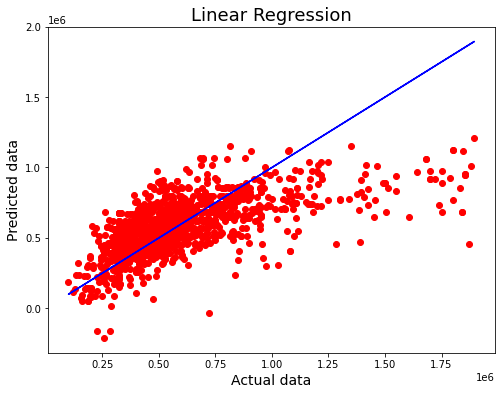

In [257]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=test_y, y=pred_test, color='r')
plt.plot(test_y,test_y, color='b')
plt.xlabel('Actual data',fontsize=14)
plt.ylabel('Predicted data',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [258]:
# Importing Libraries and Hyper parameter tuning:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [259]:
from sklearn.linear_model import Lasso  #Importing Lasso library

parameters = {'alpha':[.0001, .001, .01, .1, 1,10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [260]:
ls = Lasso(alpha=10,random_state=0)
ls.fit(train_x,train_y)
ls.score(train_x,train_y)
print('ls score',ls.score(train_x,train_y))
pred_ls = ls.predict(test_x)

r2s = r2_score(test_y,pred_ls)
print('r2 score',r2s*100)

ls score 0.42496003734404064
r2 score 41.14652982141232


In [264]:
cv_score=cross_val_score(ls,x,y,cv=2)
cv_mean=cv_score.mean()
cv_mean

0.39951314090037726

## 1. Random Forest Regressor

In [265]:
# Importing Libraries and Hyper parameter tuning:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse', 'mae'],'max_features':["auto", "sqrt", "log2"]}
rf =RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [266]:
rf= RandomForestRegressor(criterion="mse",max_features="auto")
rf.fit(train_x,train_y)
rf.score(train_x,train_y)
predrf = rf.predict(test_x)
print('rf score',rf.score(train_x,train_y))
rfs = r2_score(test_y,predrf)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,x,y,cv=2)
rfc = rfscore.mean()
print('Cross Val Score:',rfc*100)
print("Mean squared error:",mean_squared_error(test_y,predrf))
print("Mean absolute error:",mean_absolute_error(test_y,predrf))

rf score 0.9884218315247001
R2 Score: 90.08170508911947
Cross Val Score: 86.36686763097457
Mean squared error: 8924027521.641525
Mean absolute error: 45662.57994218949


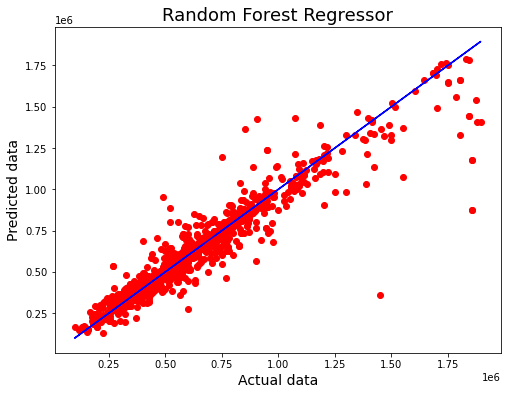

In [267]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=test_y, y=predrf, color='r')
plt.plot(test_y,test_y, color='b')
plt.xlabel('Actual data',fontsize=14)
plt.ylabel('Predicted data',fontsize=14)
plt.title('Random Forest Regressor',fontsize=18)
plt.show()

## 2. Decision Tree Regressor

In [268]:
# Importing Libraries and Hyper parameter tuning:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

parameters = {'criterion':['mse', 'mae'],
              'max_features':["auto","sqrt", "log2"],
              'max_depth':[2,4,8,10,None],
            'min_samples_split':[0.25,0.5,1.0]}
dt =DecisionTreeRegressor()
clf = GridSearchCV(dt,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'criterion': 'mse', 'max_depth': 8, 'max_features': 'auto', 'min_samples_split': 0.25}


In [269]:
dt =DecisionTreeRegressor(criterion="mse",max_features="auto",max_depth=8,min_samples_split=0.25)
dt.fit(train_x,train_y)
dt.score(train_x,train_y)
predt = dt.predict(test_x)
print('dt score',dt.score(train_x,train_y))
dts = r2_score(test_y,predt)
print('R2 Score:',dts*100)

dtscore = cross_val_score(dt,x,y,cv=2)
dtc = dtscore.mean()
print('Cross Val Score:',dtc*100)
print("Mean squared error:",mean_squared_error(test_y,predt))
print("Mean absolute error:",mean_absolute_error(test_y,predt))

dt score 0.37149582688547356
R2 Score: 37.89879295040157
Cross Val Score: 34.22555162915215
Mean squared error: 55875821985.27053
Mean absolute error: 160091.02777572075


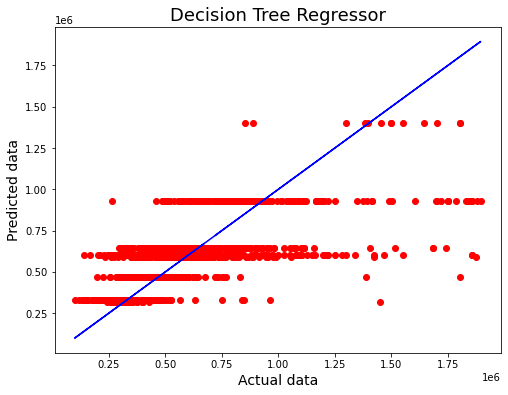

In [270]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=test_y, y=predt, color='r')
plt.plot(test_y,test_y, color='b')
plt.xlabel('Actual data',fontsize=14)
plt.ylabel('Predicted data',fontsize=14)
plt.title('Decision Tree Regressor',fontsize=18)
plt.show()

## 3. KNeighborsRegressor

In [271]:
# Importing Libraries and Hyper parameter tuning:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error

parameters = {'n_neighbors':list(range(0,10)),
              'weights':['uniform', 'distance'],
              'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
              }
kn =KNeighborsRegressor()
clf = GridSearchCV(kn,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}


In [273]:
kn =KNeighborsRegressor(n_neighbors=9,algorithm="auto",weights='distance')
kn.fit(train_x,train_y)
kn.score(train_x,train_y)
predkn = kn.predict(test_x)
print('kn score',kn.score(train_x,train_y))
kns = r2_score(test_y,predkn)
print('R2 Score:',kns*100)

knscore = cross_val_score(kn,x,y,cv=7)
knc = knscore.mean()
print('Cross Val Score:',knc*100)
print("Mean squared error:",mean_squared_error(test_y,predkn))
print("Mean absolute error:",mean_absolute_error(test_y,predkn))

kn score 0.9999827980029782
R2 Score: 85.4984830547524
Cross Val Score: 84.93799993173525
Mean squared error: 13047800805.2547
Mean absolute error: 48619.812441345406


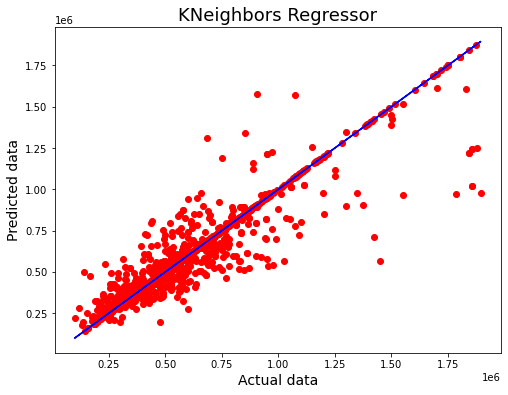

In [274]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=test_y, y=predkn, color='r')
plt.plot(test_y,test_y, color='b')
plt.xlabel('Actual data',fontsize=14)
plt.ylabel('Predicted data',fontsize=14)
plt.title('KNeighbors Regressor',fontsize=18)
plt.show()

## 4. SVR

In [275]:
# Importing Libraries and Hyper parameter tuning:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error
svr =SVR()
parameters = [{'kernel': ['rbf'], 'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],'C': [1, 10, 100, 1000, 10000]}]

clf = GridSearchCV(svr,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'C': 10000, 'gamma': 0.2, 'kernel': 'rbf'}


In [277]:
svr =SVR(C=10000,gamma=0.2,kernel='rbf')
svr.fit(train_x,train_y)
svr.score(train_x,train_y)
predsvr = svr.predict(test_x)
print('svr score',svr.score(train_x,train_y))
svrs = r2_score(test_y,predsvr)
print('R2 Score:',svrs*100)

svrscore = cross_val_score(svr,x,y,cv=7)
svrc = svrscore.mean()
print('Cross Val Score:',svrc*100)
print("Mean squared error:",mean_squared_error(test_y,predsvr))
print("Mean absolute error:",mean_absolute_error(test_y,predsvr))

svr score 0.47054074196511564
R2 Score: 44.022076854138746
Cross Val Score: 44.168034184638536
Mean squared error: 50366371563.522194
Mean absolute error: 137996.84203620307


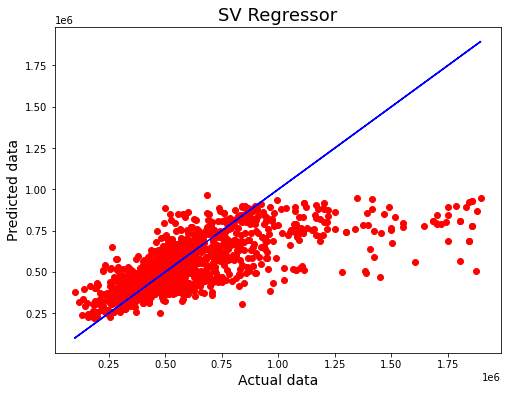

In [278]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=test_y, y=predsvr, color='r')
plt.plot(test_y,test_y, color='b')
plt.xlabel('Actual data',fontsize=14)
plt.ylabel('Predicted data',fontsize=14)
plt.title('SV Regressor',fontsize=18)
plt.show()

## Best Model:

K-Neighbors Regressor R2 Score and Cross validation score have very less difference as their values are 85.49% and 84.93% respectively and has less mean squared error so it is the best Model.

# Model saving:

In [279]:
import pickle
filename = 'car_prices.pkl'
pickle.dump(kn, open(filename, 'wb'))

## Accuracy

In [280]:
loaded_model = pickle.load(open('car_prices.pkl','rb'))
result = loaded_model.score(test_x, test_y)
print(result)

0.8549848305475239


Accuracy of the model is 85.4%

## Conclusion:

In [281]:
import numpy as np
a=np.array(test_y)
predkn =np.array(kn.predict(test_x))
df_com=pd.DataFrame({"original":a, "predicted": predkn},index=range(len(a)))
df_com

,original,predicted
0,670999,583728.328317
1,437099,437099.000000
2,866899,866899.000000
3,1550001,965201.319155
4,685199,685199.000000
...,...,...
1343,303799,303799.000000
1344,516299,516299.000000
1345,863999,863999.000000
1346,385099,385099.000000


Predicted value is approximately equal to actual values.